In [7]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [8]:
df = pd.read_csv('./data/공공자전거 대여이력 정보_2021.06.csv', engine = 'python')
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30385,2021-05-31 23:07:00,3571,화양 APT(횡단보도 옆),0,2021-06-01 00:00:00,3538,서울숲 IT캐슬,0,53,2502.80
1,SPB-46321,2021-05-31 23:37:19,1911,구로디지털단지역 앞,0,2021-06-01 00:00:02,1843,독산고등학교,0,22,1630.00
2,SPB-48119,2021-05-31 23:48:40,3860,건국대학교 정문 앞,0,2021-06-01 00:00:03,3586,군자역 비채온 오피스텔,0,11,1420.00
3,SPB-55360,2021-05-31 23:47:52,2222,사당역 12번출구 뒤,0,2021-06-01 00:00:05,2228,뒷벌공원 옆,0,12,1350.00
4,SPB-54699,2021-05-31 23:51:14,1955,디지털입구 교차로,0,2021-06-01 00:00:08,1856,모두의학교,0,8,930.00
...,...,...,...,...,...,...,...,...,...,...,...
3445866,SPB-36886,2021-06-30 22:44:14,152,마포구민체육센터 앞,0,2021-07-01 04:48:33,126,서강대 후문 옆,0,364,10153.36
3445867,SPB-30409,2021-06-30 22:45:19,152,마포구민체육센터 앞,0,2021-07-01 04:52:25,437,대흥역 1번출구,0,367,10100.71
3445868,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,437,대흥역 1번출구,0,368,430.00
3445869,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,2526,반포경남쇼핑 앞,0,404,0.00


In [9]:
df = df.drop(['자전거번호', '대여대여소번호', '대여거치대', '반납대여소번호', '반납거치대', '이용시간', '이용거리'], axis = 1)
df

,대여일시,대여대여소명,반납일시,반납대여소명
0,2021-05-31 23:07:00,화양 APT(횡단보도 옆),2021-06-01 00:00:00,서울숲 IT캐슬
1,2021-05-31 23:37:19,구로디지털단지역 앞,2021-06-01 00:00:02,독산고등학교
2,2021-05-31 23:48:40,건국대학교 정문 앞,2021-06-01 00:00:03,군자역 비채온 오피스텔
3,2021-05-31 23:47:52,사당역 12번출구 뒤,2021-06-01 00:00:05,뒷벌공원 옆
4,2021-05-31 23:51:14,디지털입구 교차로,2021-06-01 00:00:08,모두의학교
...,...,...,...,...
3445866,2021-06-30 22:44:14,마포구민체육센터 앞,2021-07-01 04:48:33,서강대 후문 옆
3445867,2021-06-30 22:45:19,마포구민체육센터 앞,2021-07-01 04:52:25,대흥역 1번출구
3445868,2021-06-30 22:43:43,마포구민체육센터 앞,2021-07-01 04:52:27,대흥역 1번출구
3445869,2021-06-30 22:11:14,반포본동 주민센터 앞,2021-07-01 04:55:29,반포경남쇼핑 앞


In [10]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [11]:
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여요일'] = df['대여일시'].dt.dayofweek
df['대여시간'] = df['대여일시'].dt.hour
df['대여시간_분'] = df['대여일시'].dt.minute

df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납요일'] = df['반납일시'].dt.dayofweek
df['반납시간'] = df['반납일시'].dt.hour
df['반납시간_분'] = df['반납일시'].dt.minute

In [12]:
df = df.sort_values('대여일시', ignore_index = True)
df

,대여일시,대여대여소명,반납일시,반납대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-05-31 18:39:50,신목동역 2번 출구,2021-06-01 00:10:23,목동아파트2단지 222동 앞,5,31,0,18,39,6,1,1,0,10
1,2021-05-31 19:03:06,잠실새내역 1번출구,2021-06-01 00:27:39,잠실본동주민센터뒤 잠실근린공원,5,31,0,19,3,6,1,1,0,27
2,2021-05-31 19:16:35,조원동서울본병원,2021-06-01 00:15:25,봉림교 교통섬,5,31,0,19,16,6,1,1,0,15
3,2021-05-31 19:17:35,혜화역 3번출구 뒤,2021-06-01 00:33:45,LG베스트샵 종암점,5,31,0,19,17,6,1,1,0,33
4,2021-05-31 19:21:39,뚝섬 유원지역,2021-06-01 00:03:39,뚝섬유원지역 1번출구 앞,5,31,0,19,21,6,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445866,2021-06-30 23:56:16,노들역 1번출구,2021-07-01 00:03:17,사육신공원앞,6,30,2,23,56,7,1,3,0,3
3445867,2021-06-30 23:56:22,독립문역 사거리,2021-07-01 00:04:52,독립문역 3-1번출구,6,30,2,23,56,7,1,3,0,4
3445868,2021-06-30 23:56:22,한강트럼프월드3차 앞,2021-07-01 00:06:14,한강트럼프월드3차 앞,6,30,2,23,56,7,1,3,0,6
3445869,2021-06-30 23:58:26,대림아파트 사거리,2021-07-01 00:06:51,신길삼거리(우리은행),6,30,2,23,58,7,1,3,0,6


In [13]:
df = df[df['대여월'] != 5]
df = df[df['반납월'] != 7]
df

,대여일시,대여대여소명,반납일시,반납대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
1342,2021-06-01 00:00:01,LG베스트샵 종암점,2021-06-01 00:15:20,용문2교 옆,6,1,1,0,0,6,1,1,0,15
1343,2021-06-01 00:00:01,영등포구청역 1번출구,2021-06-01 00:11:17,유원목동아파트 앞,6,1,1,0,0,6,1,1,0,11
1344,2021-06-01 00:00:02,서남병원 후문,2021-06-01 00:06:00,잣절보도육교 아래,6,1,1,0,0,6,1,1,0,6
1345,2021-06-01 00:00:06,안암2교 옆,2021-06-01 00:04:51,보문역6번출구 앞,6,1,1,0,0,6,1,1,0,4
1346,2021-06-01 00:00:06,한성대입구역2번출구,2021-06-01 00:23:20,상왕십리역 4번 출구 앞,6,1,1,0,0,6,1,1,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445569,2021-06-30 22:49:40,양평1 보행육교 앞,2021-06-30 22:53:15,양평동6차현대아파트 앞,6,30,2,22,49,6,30,2,22,53
3445602,2021-06-30 22:50:11,강변역 4번출구 뒤,2021-06-30 22:53:13,구의삼성쉐르빌 앞,6,30,2,22,50,6,30,2,22,53
3445621,2021-06-30 22:50:32,증산3교 앞,2021-06-30 22:52:57,증산3교 앞,6,30,2,22,50,6,30,2,22,52
3445726,2021-06-30 22:52:06,성북3교 위,2021-06-30 23:48:56,성북3교 위,6,30,2,22,52,6,30,2,23,48


In [14]:
df['대여대여소명'] = df['대여대여소명'].astype('category')
df['반납대여소명'] = df['반납대여소명'].astype('category')

### 평균서비스율(10분당 자전거 대여수의 평균) = $\mu$
- $\mu$ = 10이면 10분동안 평균 10대의 자전거 대여

In [15]:
df_rental = df[['대여일시', '대여대여소명', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-06-01 00:00:01,LG베스트샵 종암점,6,1,1,0,0
1,2021-06-01 00:00:01,영등포구청역 1번출구,6,1,1,0,0
2,2021-06-01 00:00:02,서남병원 후문,6,1,1,0,0
3,2021-06-01 00:00:06,안암2교 옆,6,1,1,0,0
4,2021-06-01 00:00:06,한성대입구역2번출구,6,1,1,0,0
...,...,...,...,...,...,...,...
3442051,2021-06-30 22:49:40,양평1 보행육교 앞,6,30,2,22,49
3442052,2021-06-30 22:50:11,강변역 4번출구 뒤,6,30,2,22,50
3442053,2021-06-30 22:50:32,증산3교 앞,6,30,2,22,50
3442054,2021-06-30 22:52:06,성북3교 위,6,30,2,22,52


In [16]:
df_rental = df_rental[df_rental['대여대여소명'] == '마포구민체육센터 앞']
df_rental.reset_index(drop = True, inplace = True)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-06-01 00:01:16,마포구민체육센터 앞,6,1,1,0,1
1,2021-06-01 00:01:32,마포구민체육센터 앞,6,1,1,0,1
2,2021-06-01 00:06:32,마포구민체육센터 앞,6,1,1,0,6
3,2021-06-01 00:07:00,마포구민체육센터 앞,6,1,1,0,7
4,2021-06-01 00:07:50,마포구민체육센터 앞,6,1,1,0,7
...,...,...,...,...,...,...,...
10919,2021-06-30 22:21:00,마포구민체육센터 앞,6,30,2,22,21
10920,2021-06-30 22:25:10,마포구민체육센터 앞,6,30,2,22,25
10921,2021-06-30 22:29:17,마포구민체육센터 앞,6,30,2,22,29
10922,2021-06-30 22:29:18,마포구민체육센터 앞,6,30,2,22,29


#### 0시

In [17]:
df_rental_hour = df_rental[df_rental['대여시간'] == 0]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,88
1,10,76
2,20,70
3,30,67
4,40,57
5,50,60


In [18]:
# 10분당 평균 대여율 = 평균서비스율

mu0 = df_rental_hour_group['count'].sum() / 6
mu0

69.66666666666667

#### 1시

In [19]:
df_rental_hour = df_rental[df_rental['대여시간'] == 1]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,60
1,10,58
2,20,44
3,30,39
4,40,36
5,50,36


In [20]:
# 1시 10분당 평균 대여율 = 평균서비스율

mu1 = df_rental_hour_group['count'].sum() / 6
mu1

45.5

#### 2시

In [21]:
df_rental_hour = df_rental[df_rental['대여시간'] == 2]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,30
1,10,32
2,20,39
3,30,14
4,40,24
5,50,24


In [22]:
# 2시 10분당 평균 대여율 = 평균서비스율

mu2 = df_rental_hour_group['count'].sum() / 6
mu2

27.166666666666668

#### 3시

In [23]:
df_rental_hour = df_rental[df_rental['대여시간'] == 3]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,18
1,10,20
2,20,5
3,30,12
4,40,9
5,50,12


In [24]:
# 10분당 평균 대여율 = 평균서비스율

mu3 = df_rental_hour_group['count'].sum() / 6
mu3

12.666666666666666

#### 4시

In [25]:
df_rental_hour = df_rental[df_rental['대여시간'] == 4]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,9
1,10,5
2,20,3
3,30,5
4,40,4
5,50,10


In [26]:
# 10분당 평균 대여율 = 평균서비스율

mu4 = df_rental_hour_group['count'].sum() / 6
mu4

6.0

#### 5시

In [27]:
df_rental_hour = df_rental[df_rental['대여시간'] == 5]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,12
1,10,8
2,20,4
3,30,5
4,40,4
5,50,3


In [28]:
# 10분당 평균 대여율 = 평균서비스율

mu5 = df_rental_hour_group['count'].sum() / 6
mu5

6.0

#### 6시

In [29]:
df_rental_hour = df_rental[df_rental['대여시간'] == 6]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,5
1,10,14
2,20,19
3,30,6
4,40,10
5,50,15


In [30]:
# 10분당 평균 대여율 = 평균서비스율

mu6 = df_rental_hour_group['count'].sum() / 6
mu6

11.5

#### 7시

In [31]:
df_rental_hour = df_rental[df_rental['대여시간'] == 7]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,31
1,10,46
2,20,38
3,30,31
4,40,32
5,50,34


In [32]:
# 10분당 평균 대여율 = 평균서비스율

mu7 = df_rental_hour_group['count'].sum() / 6
mu7

35.333333333333336

#### 8시

In [33]:
df_rental_hour = df_rental[df_rental['대여시간'] == 8]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,39
1,10,48
2,20,63
3,30,47
4,40,37
5,50,29


In [34]:
# 10분당 평균 대여율 = 평균서비스율

mu8 = df_rental_hour_group['count'].sum() / 6
mu8

43.833333333333336

#### 9시

In [35]:
df_rental_hour = df_rental[df_rental['대여시간'] == 9]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,39
1,10,41
2,20,40
3,30,33
4,40,37
5,50,30


In [36]:
# 10분당 평균 대여율 = 평균서비스율

mu9 = df_rental_hour_group['count'].sum() / 6
mu9

36.666666666666664

#### 10시

In [37]:
df_rental_hour = df_rental[df_rental['대여시간'] == 10]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,40
1,10,47
2,20,36
3,30,46
4,40,47
5,50,34


In [38]:
# 10분당 평균 대여율 = 평균서비스율

mu10 = df_rental_hour_group['count'].sum() / 6
mu10

41.666666666666664

#### 11시

In [39]:
df_rental_hour = df_rental[df_rental['대여시간'] == 11]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,46
1,10,49
2,20,41
3,30,43
4,40,45
5,50,49


In [40]:
# 10분당 평균 대여율 = 평균서비스율

mu11 = df_rental_hour_group['count'].sum() / 6
mu11

45.5

#### 12시

In [41]:
df_rental_hour = df_rental[df_rental['대여시간'] == 12]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,45
1,10,37
2,20,49
3,30,37
4,40,46
5,50,46


In [42]:
# 10분당 평균 대여율 = 평균서비스율

mu12 = df_rental_hour_group['count'].sum() / 6
mu12

43.333333333333336

#### 13시

In [43]:
df_rental_hour = df_rental[df_rental['대여시간'] == 13]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,35
1,10,49
2,20,48
3,30,52
4,40,50
5,50,36


In [44]:
# 10분당 평균 대여율 = 평균서비스율

mu13 = df_rental_hour_group['count'].sum() / 6
mu13

45.0

#### 14시

In [45]:
df_rental_hour = df_rental[df_rental['대여시간'] == 14]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,55
1,10,49
2,20,54
3,30,50
4,40,85
5,50,65


In [46]:
# 10분당 평균 대여율 = 평균서비스율

mu14 = df_rental_hour_group['count'].sum() / 6
mu14

59.666666666666664

#### 15시

In [47]:
df_rental_hour = df_rental[df_rental['대여시간'] == 15]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,65
1,10,80
2,20,59
3,30,71
4,40,89
5,50,81


In [48]:
# 10분당 평균 대여율 = 평균서비스율

mu15 = df_rental_hour_group['count'].sum() / 6
mu15

74.16666666666667

#### 16시

In [49]:
df_rental_hour = df_rental[df_rental['대여시간'] == 16]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,91
1,10,71
2,20,67
3,30,98
4,40,77
5,50,92


In [50]:
# 10분당 평균 대여율 = 평균서비스율

mu16 = df_rental_hour_group['count'].sum() / 6
mu16

82.66666666666667

#### 17시

In [51]:
df_rental_hour = df_rental[df_rental['대여시간'] == 17]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,107
1,10,108
2,20,135
3,30,102
4,40,115
5,50,148


In [52]:
# 10분당 평균 대여율 = 평균서비스율

mu17 = df_rental_hour_group['count'].sum() / 6
mu17

119.16666666666667

#### 18시

In [53]:
df_rental_hour = df_rental[df_rental['대여시간'] == 18]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,134
1,10,140
2,20,144
3,30,150
4,40,159
5,50,127


In [54]:
# 10분당 평균 대여율 = 평균서비스율

mu18 = df_rental_hour_group['count'].sum() / 6
mu18

142.33333333333334

#### 19시

In [55]:
df_rental_hour = df_rental[df_rental['대여시간'] == 19]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,146
1,10,161
2,20,178
3,30,175
4,40,187
5,50,210


In [56]:
# 10분당 평균 대여율 = 평균서비스율

mu19 = df_rental_hour_group['count'].sum() / 6
mu19

176.16666666666666

#### 20시

In [57]:
df_rental_hour = df_rental[df_rental['대여시간'] == 20]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,177
1,10,198
2,20,185
3,30,170
4,40,200
5,50,195


In [58]:
# 10분당 평균 대여율 = 평균서비스율

mu20 = df_rental_hour_group['count'].sum() / 6
mu20

187.5

#### 21시

In [59]:
df_rental_hour = df_rental[df_rental['대여시간'] == 21]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,190
1,10,198
2,20,212
3,30,190
4,40,217
5,50,220


In [60]:
# 10분당 평균 대여율 = 평균서비스율

mu21 = df_rental_hour_group['count'].sum() / 6
mu21

204.5

#### 22시

In [61]:
df_rental_hour = df_rental[df_rental['대여시간'] == 22]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,215
1,10,199
2,20,212
3,30,178
4,40,145
5,50,168


In [62]:
# 10분당 평균 대여율 = 평균서비스율

mu22 = df_rental_hour_group['count'].sum() / 6
mu22

186.16666666666666

#### 23시

In [63]:
df_rental_hour = df_rental[df_rental['대여시간'] == 23]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,167
1,10,133
2,20,136
3,30,90
4,40,94
5,50,91


In [64]:
# 10분당 평균 대여율 = 평균서비스율

mu23 = df_rental_hour_group['count'].sum() / 6
mu23

118.5

- 2021년 6월 한달동안의 마포구민체육센터 앞 대여소의 평균서비스율 뮤(10분당 평균 대여수)는

In [65]:
a = [mu0, mu1, mu2, mu3, mu4, mu5, mu6, mu7, mu8, mu9, mu10, mu11, mu12, mu13, mu14, mu15, mu16, mu17, mu18, mu19, mu20, mu21, mu22, mu23]
time = ['0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시',
       '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시']

result = pd.DataFrame(time)
result.columns = ['time']
result['mu'] = a
result

,time,mu
0,0시,69.666667
1,1시,45.500000
2,2시,27.166667
3,3시,12.666667
4,4시,6.000000
5,5시,6.000000
6,6시,11.500000
7,7시,35.333333
8,8시,43.833333
9,9시,36.666667


### 평균도착률(10분당 자전거 반납수의 평균) = $\lambda$
- $\lambda$ = 10이면 10분동안 평균 10대의 자전거를 반납

In [66]:
df_return = df[['반납일시', '반납대여소명', '반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
1342,2021-06-01 00:15:20,용문2교 옆,6,1,1,0,15
1343,2021-06-01 00:11:17,유원목동아파트 앞,6,1,1,0,11
1344,2021-06-01 00:06:00,잣절보도육교 아래,6,1,1,0,6
1345,2021-06-01 00:04:51,보문역6번출구 앞,6,1,1,0,4
1346,2021-06-01 00:23:20,상왕십리역 4번 출구 앞,6,1,1,0,23
...,...,...,...,...,...,...,...
3445569,2021-06-30 22:53:15,양평동6차현대아파트 앞,6,30,2,22,53
3445602,2021-06-30 22:53:13,구의삼성쉐르빌 앞,6,30,2,22,53
3445621,2021-06-30 22:52:57,증산3교 앞,6,30,2,22,52
3445726,2021-06-30 23:48:56,성북3교 위,6,30,2,23,48


In [67]:
df_return = df_return[df_return['반납대여소명'] == '마포구민체육센터 앞']
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
1613,2021-06-01 00:45:58,마포구민체육센터 앞,6,1,1,0,45
2089,2021-06-01 00:34:26,마포구민체육센터 앞,6,1,1,0,34
2920,2021-06-01 01:26:19,마포구민체육센터 앞,6,1,1,1,26
3663,2021-06-01 01:41:58,마포구민체육센터 앞,6,1,1,1,41
4117,2021-06-01 01:56:13,마포구민체육센터 앞,6,1,1,1,56
...,...,...,...,...,...,...,...
3441216,2021-06-30 22:28:49,마포구민체육센터 앞,6,30,2,22,28
3442301,2021-06-30 22:43:05,마포구민체육센터 앞,6,30,2,22,43
3442416,2021-06-30 22:25:24,마포구민체육센터 앞,6,30,2,22,25
3442746,2021-06-30 22:43:15,마포구민체육센터 앞,6,30,2,22,43


#### 0시

In [68]:
df_return_hour = df_return[df_return['반납시간'] == 0]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,92
1,10,91
2,20,64
3,30,80
4,40,68
5,50,47


In [69]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda0 = df_return_hour_group['count'].sum() / 6
lda0

73.66666666666667

#### 1시

In [70]:
df_return_hour = df_return[df_return['반납시간'] == 1]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,43
1,10,51
2,20,46
3,30,51
4,40,47
5,50,34


In [71]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda1 = df_return_hour_group['count'].sum() / 6
lda1

45.333333333333336

#### 2시

In [72]:
df_return_hour = df_return[df_return['반납시간'] == 2]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,23
1,10,41
2,20,26
3,30,13
4,40,21
5,50,8


In [73]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda2 = df_return_hour_group['count'].sum() / 6
lda2

22.0

#### 3시

In [74]:
df_return_hour = df_return[df_return['반납시간'] == 3]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,20
1,10,13
2,20,9
3,30,9
4,40,20
5,50,5


In [75]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda3 = df_return_hour_group['count'].sum() / 6
lda3

12.666666666666666

#### 4시

In [76]:
df_return_hour = df_return[df_return['반납시간'] == 4]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,12
1,10,7
2,20,4
3,30,1
4,40,8
5,50,13


In [77]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda4 = df_return_hour_group['count'].sum() / 6
lda4

7.5

#### 5시

In [78]:
df_return_hour = df_return[df_return['반납시간'] == 5]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,9
1,10,9
2,20,6
3,30,5
4,40,5
5,50,5


In [79]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda5 = df_return_hour_group['count'].sum() / 6
lda5

6.5

#### 6시

In [80]:
df_return_hour = df_return[df_return['반납시간'] == 6]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,9
1,10,12
2,20,10
3,30,19
4,40,28
5,50,21


In [81]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda6 = df_return_hour_group['count'].sum() / 6
lda6

16.5

#### 7시

In [82]:
df_return_hour = df_return[df_return['반납시간'] == 7]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,14
1,10,14
2,20,15
3,30,17
4,40,19
5,50,21


In [83]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda7 = df_return_hour_group['count'].sum() / 6
lda7

16.666666666666668

#### 8시

In [84]:
df_return_hour = df_return[df_return['반납시간'] == 8]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,23
1,10,56
2,20,65
3,30,20
4,40,27
5,50,19


In [85]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda8 = df_return_hour_group['count'].sum() / 6
lda8

35.0

#### 9시

In [86]:
df_return_hour = df_return[df_return['반납시간'] == 9]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,28
1,10,50
2,20,36
3,30,31
4,40,27
5,50,42


In [87]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda9 = df_return_hour_group['count'].sum() / 6
lda9

35.666666666666664

#### 10시

In [88]:
df_return_hour = df_return[df_return['반납시간'] == 10]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,38
1,10,28
2,20,28
3,30,31
4,40,47
5,50,47


In [89]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda10 = df_return_hour_group['count'].sum() / 6
lda10

36.5

#### 11시

In [90]:
df_return_hour = df_return[df_return['반납시간'] == 11]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,38
1,10,33
2,20,33
3,30,54
4,40,42
5,50,47


In [91]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda11 = df_return_hour_group['count'].sum() / 6
lda11

41.166666666666664

#### 12시

In [92]:
df_return_hour = df_return[df_return['반납시간'] == 12]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,40
1,10,48
2,20,55
3,30,50
4,40,62
5,50,30


In [93]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda12 = df_return_hour_group['count'].sum() / 6
lda12

47.5

#### 13시

In [94]:
df_return_hour = df_return[df_return['반납시간'] == 13]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,70
1,10,49
2,20,55
3,30,55
4,40,81
5,50,49


In [95]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda13 = df_return_hour_group['count'].sum() / 6
lda13

59.833333333333336

#### 14시

In [96]:
df_return_hour = df_return[df_return['반납시간'] == 14]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,50
1,10,68
2,20,56
3,30,63
4,40,84
5,50,72


In [97]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda14 = df_return_hour_group['count'].sum() / 6
lda14

65.5

#### 15시

In [98]:
df_return_hour = df_return[df_return['반납시간'] == 15]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,70
1,10,65
2,20,61
3,30,90
4,40,105
5,50,92


In [99]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda15 = df_return_hour_group['count'].sum() / 6
lda15

80.5

#### 16시

In [100]:
df_return_hour = df_return[df_return['반납시간'] == 16]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,75
1,10,93
2,20,75
3,30,110
4,40,99
5,50,97


In [101]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda16 = df_return_hour_group['count'].sum() / 6
lda16

91.5

#### 17시

In [102]:
df_return_hour = df_return[df_return['반납시간'] == 17]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,89
1,10,123
2,20,105
3,30,123
4,40,137
5,50,161


In [103]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda17 = df_return_hour_group['count'].sum() / 6
lda17

123.0

#### 18시

In [104]:
df_return_hour = df_return[df_return['반납시간'] == 18]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,169
1,10,172
2,20,180
3,30,205
4,40,219
5,50,235


In [105]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda18 = df_return_hour_group['count'].sum() / 6
lda18

196.66666666666666

#### 19시

In [106]:
df_return_hour = df_return[df_return['반납시간'] == 19]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,254
1,10,244
2,20,262
3,30,248
4,40,276
5,50,215


In [107]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda19 = df_return_hour_group['count'].sum() / 6
lda19

249.83333333333334

#### 20시

In [108]:
df_return_hour = df_return[df_return['반납시간'] == 20]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,238
1,10,244
2,20,256
3,30,235
4,40,287
5,50,270


In [109]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda20 = df_return_hour_group['count'].sum() / 6
lda20

255.0

#### 21시

In [110]:
df_return_hour = df_return[df_return['반납시간'] == 21]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,235
1,10,199
2,20,231
3,30,198
4,40,211
5,50,206


In [111]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda21 = df_return_hour_group['count'].sum() / 6
lda21

213.33333333333334

#### 22시

In [112]:
df_return_hour = df_return[df_return['반납시간'] == 22]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,209
1,10,176
2,20,217
3,30,181
4,40,178
5,50,171


In [113]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda22 = df_return_hour_group['count'].sum() / 6
lda22

188.66666666666666

#### 23시

In [114]:
df_return_hour = df_return[df_return['반납시간'] == 23]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,146
1,10,151
2,20,159
3,30,111
4,40,99
5,50,107


In [115]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda23 = df_return_hour_group['count'].sum() / 6
lda23

128.83333333333334

- 2021년 6월 한달동안의 마포구민체육센터 앞 대여소의 평균도착률 람다(10분당 평균 반납수)는

In [116]:
b = [lda0, lda1, lda2, lda3, lda4, lda5, lda6, lda7, lda8, lda9, lda10, lda11, lda12, lda13, lda14, lda15, lda16, lda17, lda18, lda19, lda20, lda21, lda22, lda23]

result['lambda'] = b
result

,time,mu,lambda
0,0시,69.666667,73.666667
1,1시,45.500000,45.333333
2,2시,27.166667,22.000000
3,3시,12.666667,12.666667
4,4시,6.000000,7.500000
5,5시,6.000000,6.500000
6,6시,11.500000,16.500000
7,7시,35.333333,16.666667
8,8시,43.833333,35.000000
9,9시,36.666667,35.666667


### 가용도(고객이 station에 도착했을 때 자전거가 station에 있을 확률)
$1 - (1 - \frac{\lambda}{\mu})(\frac{\lambda}{\mu})^0$ = $\frac{\lambda}{\mu}$

In [117]:
result['가용도'] = result['lambda'] / result['mu']
result = result[['time', 'lambda', 'mu', '가용도']]
result

,time,lambda,mu,가용도
0,0시,73.666667,69.666667,1.057416
1,1시,45.333333,45.500000,0.996337
2,2시,22.000000,27.166667,0.809816
3,3시,12.666667,12.666667,1.000000
4,4시,7.500000,6.000000,1.250000
5,5시,6.500000,6.000000,1.083333
6,6시,16.500000,11.500000,1.434783
7,7시,16.666667,35.333333,0.471698
8,8시,35.000000,43.833333,0.798479
9,9시,35.666667,36.666667,0.972727


In [118]:
plt.style.use('bmh')

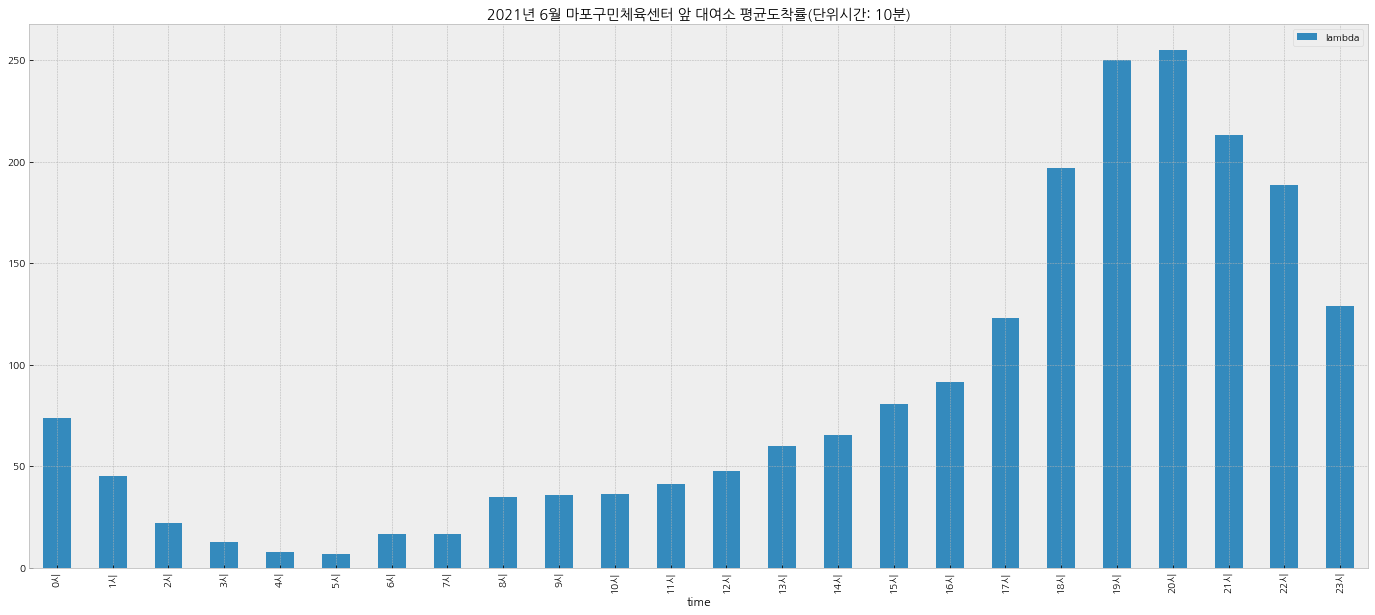

In [119]:
result.plot(kind = 'bar', x = 'time', y = 'lambda', figsize = (24, 10), 
            title = '2021년 6월 마포구민체육센터 앞 대여소 평균도착률(단위시간: 10분)')
plt.show()

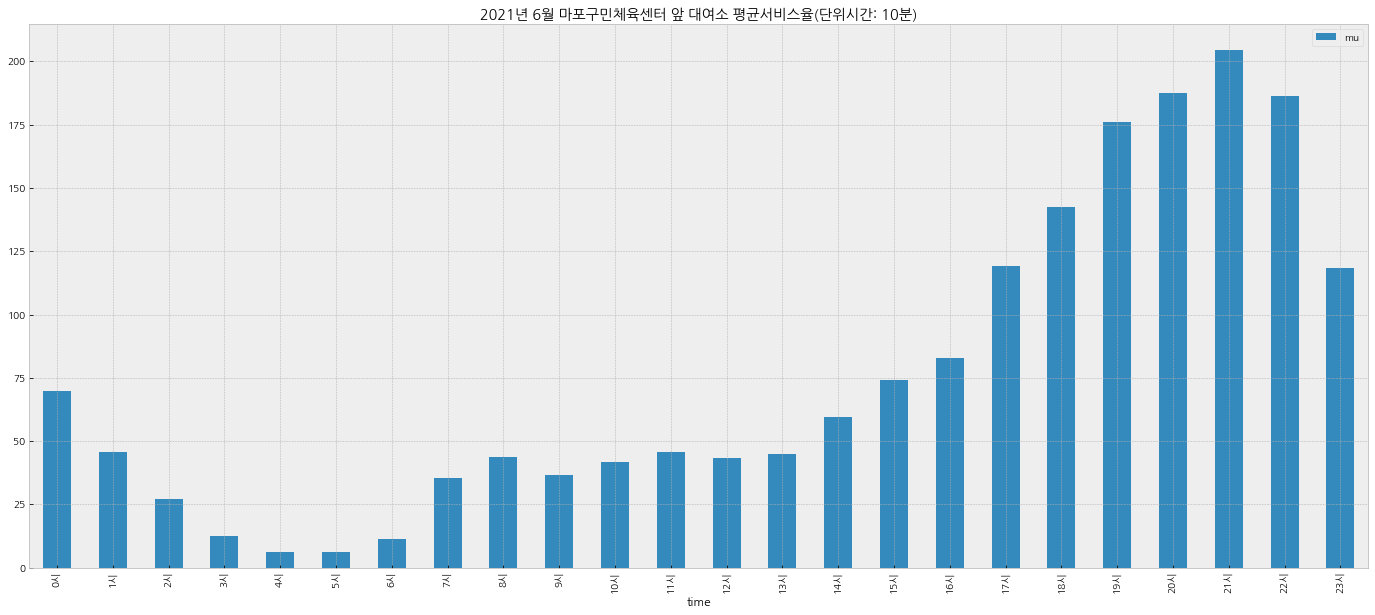

In [121]:
result.plot(kind = 'bar', x = 'time', y = 'mu', figsize = (24, 10), 
            title = '2021년 6월 마포구민체육센터 앞 대여소 평균서비스율(단위시간: 10분)')
plt.show()

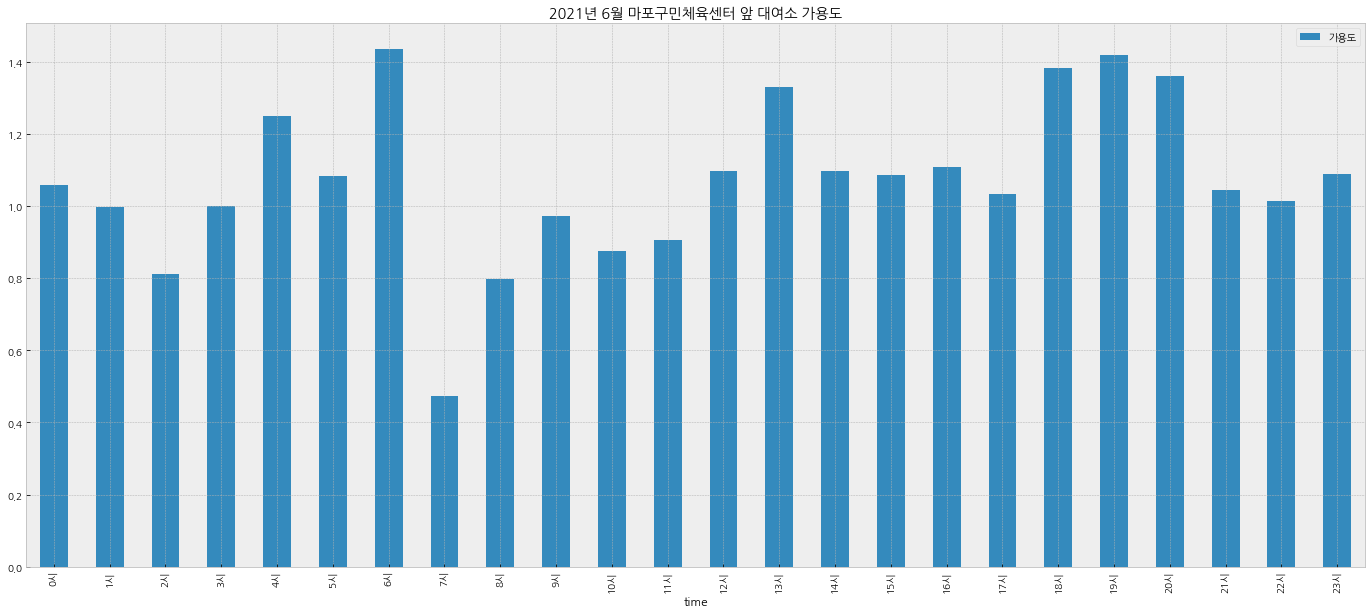

In [122]:
result.plot(kind = 'bar', x = 'time', y = '가용도', figsize = (24, 10), 
            title = '2021년 6월 마포구민체육센터 앞 대여소 가용도')
plt.show()

- 가용도가 1이하인 시간대는 반납보다 대여가 많아서 자전거 빌리기 어려움
- 2시, 7시 ~ 11시에 가용도가 1이하임
- 롯데월드타워 대여소와 뚝섬유원지역 1번출구 대여소와 비교했을 때 마포구민체육센터 앞 대여소는 가용도 대부분이 1보다 큼
- 따라서 3곳 중에서는 따릉이 이용이 가장 수월할 것으로 예상됨
- 마포구민체육센터 대여소는 6시에 비해 7시에 가용도가 뚝 떨어진 것으로 보아 출근시간이라 자전거 대여가 많거나 자전거 재배치가 이뤄졌을 것으로 예상됨